In [55]:
# utilities
import numpy as np
import pandas as pd
import string
import os
from collections import Counter

# plotting utilties
import seaborn as sns
import matplotlib.pyplot as plt

# SMOTE utilities
import imblearn
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

from imblearn.over_sampling import SMOTE

# SKlearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
# Get base path
base_path  = os.path.normpath(os.getcwd() + os.sep + os.pardir)
# Set file path
file_path = base_path + '\\EmotionLabelled\\'

In [57]:
# Read the data set
df = pd.read_csv(file_path + 'tweets_emotion_labelled.csv')

print(df.head())
# Check for null values - needs to be zero
null_values = np.sum(df.isnull().any(axis=1))
print('----------------------')
print(f'Total Null values: {null_values}')
print('----------------------')

df1 = df.dropna()
null_values = np.sum(df1.isnull().any(axis=1))
print('----------------------------------------------')
print(f'Total Null values after dropping null rows: {null_values}')
print('----------------------------------------------')

# Some information about the data set
print('Length of data set: ', len(df1))
print('Shape of data set: ', df1.shape)
print('Dataset information')
print('-------------------')
df1.info()


                        date  \
0  2022-09-09 21:29:27+00:00   
1  2022-09-09 20:47:21+00:00   
2  2022-09-09 17:11:39+00:00   
3  2022-09-09 16:58:31+00:00   
4  2022-09-09 15:12:32+00:00   

                                             content  Emotion  
0  yeah bezos tryna shame lady trauma tragedy fam...        0  
1  lisa laflamme back abrupt dismissal ctv last m...        4  
2  okay king charlesyou know speechfirst address ...        5  
3  interesting clearly measured moment icon inter...        5  
4  everyone whose like queen person familyand hit...        0  
----------------------
Total Null values: 0
----------------------
----------------------------------------------
Total Null values after dropping null rows: 0
----------------------------------------------
Length of data set:  2274
Shape of data set:  (2274, 3)
Dataset information
-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Data columns (total 3 columns):
 #   Column   

Text(0.5, 0, 'Emotion Types')

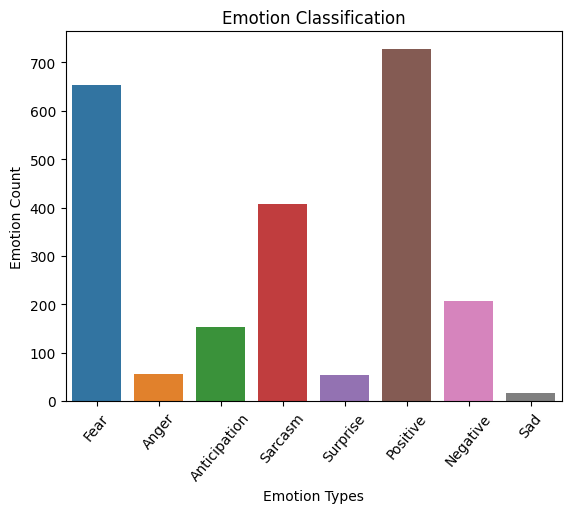

In [58]:
# Plotting the distribution for dataset.

ax = sns.countplot(x='Emotion', data=df)
ax.set_xticklabels(['Fear','Anger', 'Anticipation', 'Sarcasm', 'Surprise', 'Positive', 'Negative', 'Sad'], rotation=50)
plt.title("Emotion Classification")
plt.ylabel("Emotion Count")
plt.xlabel("Emotion Types")

In [59]:
# Split input and output elements
X = df1['content']
y = df1['Emotion']

# Splitting data as train/test - 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)

print('Shape of train data', X_train.shape)
print('Shape of train data', X_test.shape)

Shape of train data (1819,)
Shape of train data (455,)


In [60]:
# Vectorize the data set (TF-IDF)
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

# Transform the data
X_train_vect = vectoriser.transform(X_train)
X_test_vect  = vectoriser.transform(X_test)

No. of feature_words:  20698


In [61]:
# summarize emotions classes to determine minority classes
counter = Counter(y)

for emotion_type, emotion_count in sorted(counter.items()):
	percentage = emotion_count / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (emotion_type, emotion_count, percentage))

Class=0, n=654 (28.760%)
Class=1, n=55 (2.419%)
Class=2, n=152 (6.684%)
Class=3, n=408 (17.942%)
Class=4, n=54 (2.375%)
Class=5, n=728 (32.014%)
Class=6, n=207 (9.103%)
Class=7, n=16 (0.704%)


In [62]:
counter = Counter(y_train)
print('--------------------')
print('Before oversampling')
print('--------------------')
print(counter)
print('--------------------')

for emotion_type, emotion_count in sorted(counter.items()):
	percentage = emotion_count / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (emotion_type, emotion_count, percentage))

Before oversampling
--------------------
Counter({5: 592, 0: 523, 3: 324, 6: 170, 2: 119, 4: 43, 1: 34, 7: 14})
--------------------
Class=0, n=523 (28.752%)
Class=1, n=34 (1.869%)
Class=2, n=119 (6.542%)
Class=3, n=324 (17.812%)
Class=4, n=43 (2.364%)
Class=5, n=592 (32.545%)
Class=6, n=170 (9.346%)
Class=7, n=14 (0.770%)


In [63]:
# SMOTE + ENN - hypbrid technique (oversampling + undersampling) - train data set
smote_enn = SMOTEENN()
X_train_smote, y_train_smote = smote_enn.fit_resample(X_train_vect, y_train)

counter_smote = Counter(y_train_smote)
print('--------------------------------')
print('After SMOTE + ENN oversampling')
print('--------------------------------')

for emotion_type, emotion_count in sorted(counter_smote.items()):
	percentage = emotion_count / len(y_train_smote) * 100
	print('Class=%d, n=%d (%.3f%%)' % (emotion_type, emotion_count, percentage))


After SMOTE + ENN oversampling
--------------------------------
Class=0, n=124 (3.612%)
Class=1, n=592 (17.244%)
Class=2, n=587 (17.099%)
Class=3, n=372 (10.836%)
Class=4, n=592 (17.244%)
Class=5, n=16 (0.466%)
Class=6, n=558 (16.254%)
Class=7, n=592 (17.244%)
